In [1]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame


In [6]:
# Display basic statistics
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

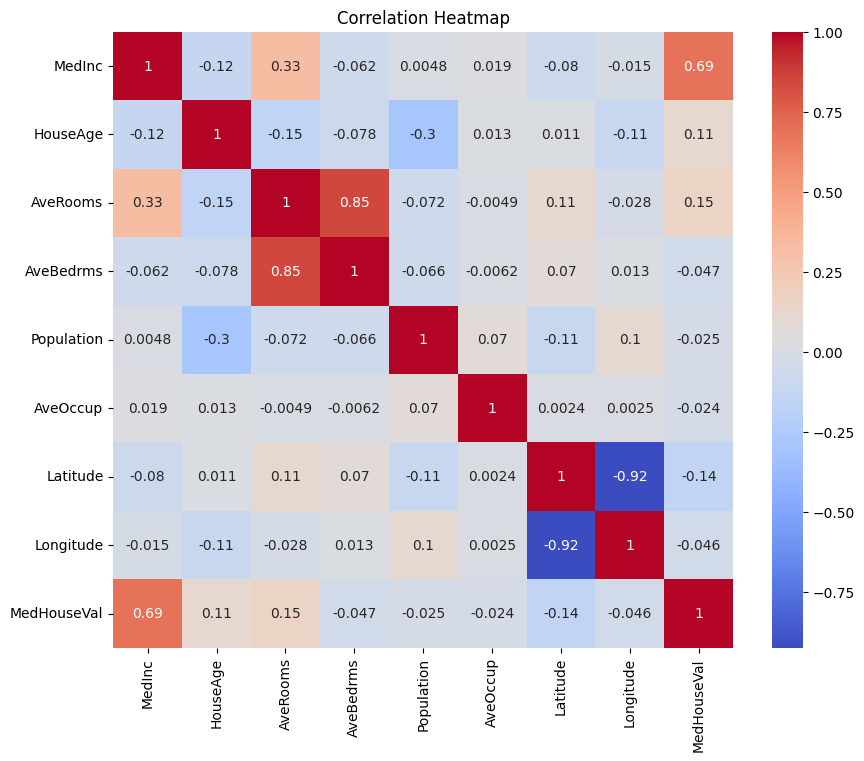

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

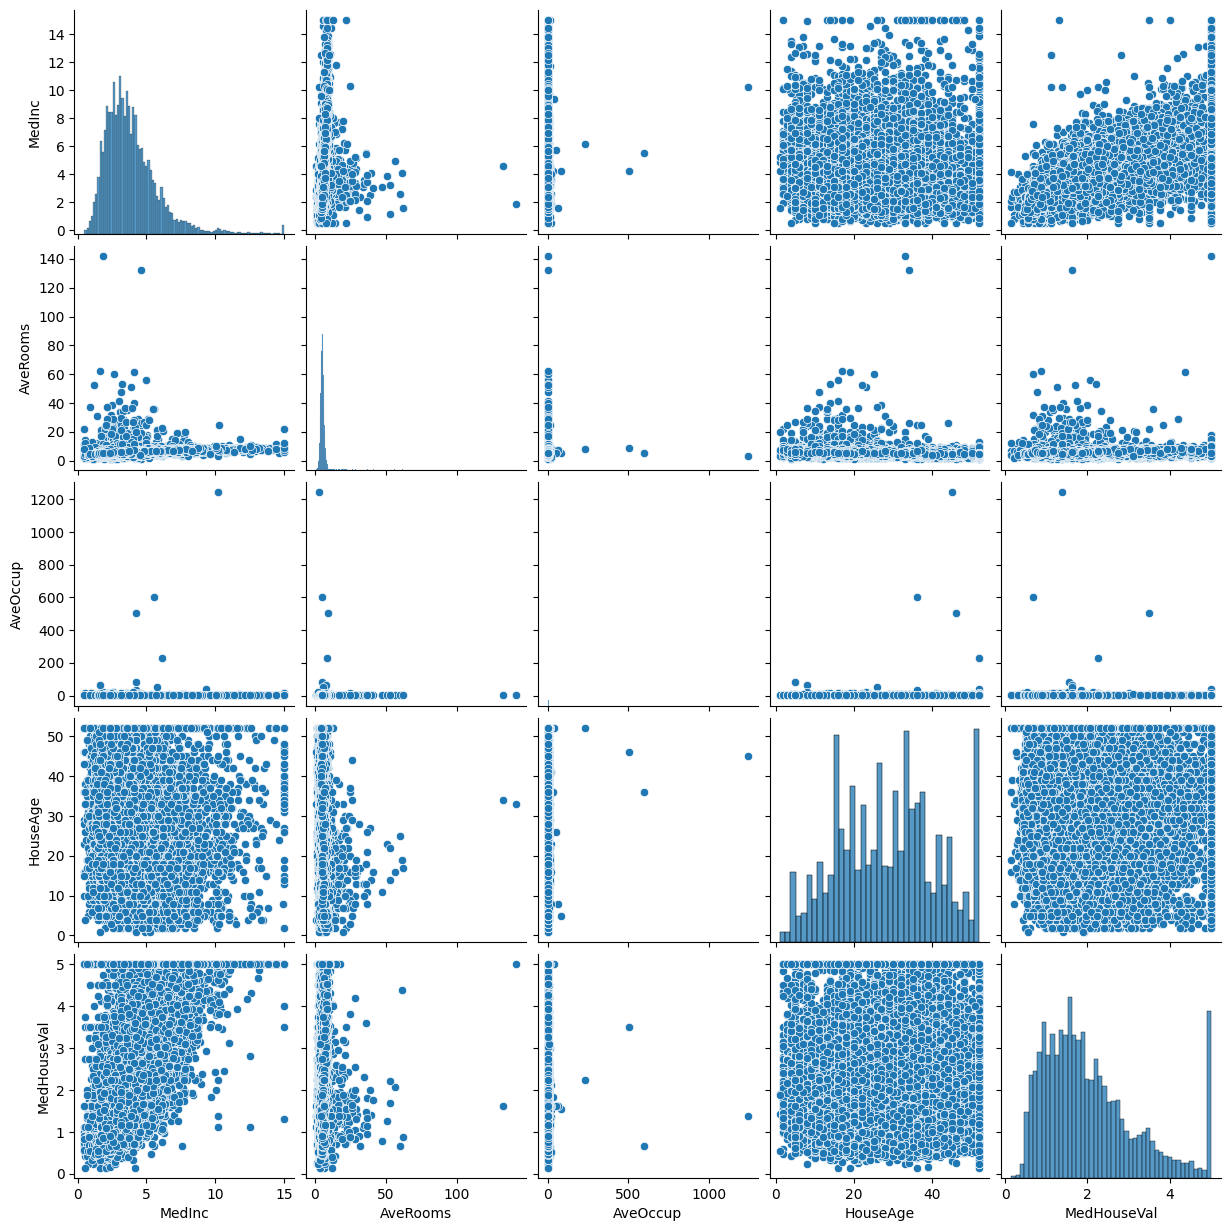

In [9]:
# Optional: scatter plots of top correlated features
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'MedHouseVal']])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [11]:
# Features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']


In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict
y_pred = lr.predict(X_test)


In [17]:
# Print model parameters and performance
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.02327770606409
R² score: 0.5757877060324508
MAE: 0.5332001304956553
MSE: 0.5558915986952444
RMSE: 0.7455813830127764


In [18]:
# Select top correlated features with MedHouseVal
top_features = df.corr()['MedHouseVal'].abs().sort_values(ascending=False)[1:6].index.tolist()
print("Top correlated features:", top_features)

X_top = df[top_features]

Top correlated features: ['MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms']


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

In [20]:
# Split scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [21]:
# Retrain model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [22]:
# New performance
print("Improved R² score:", r2_score(y_test, y_pred))
print("Improved MAE:", mean_absolute_error(y_test, y_pred))
print("Improved RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Improved R² score: 0.5129333248216975
Improved MAE: 0.5796603458789069
Improved RMSE: 0.798909596985536
